<a href="https://colab.research.google.com/github/MKolaksazov/Machine-Learning/blob/master/Stock%20Prediction/Trading_bot_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moving Average Convergence Divergence (MACD)

In [1]:
! pip install --upgrade pandas-datareader

import pandas_datareader as web

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = df.read_csv('AAPL.csv')
df = df.set_index(pd.DateTimeIndex(df['Date'].values)) # set index as date time
df

In [9]:
df = web.DataReader('BNB-USD', data_source='yahoo', start='2021-10-06', end='2022-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-06,442.479309,415.667725,442.406250,435.401367,2006344571,435.401367
2021-10-07,449.935883,424.309174,434.961914,438.761749,1962989705,438.761749
2021-10-08,441.513794,416.706024,438.475250,419.102051,2678048368,419.102051
2021-10-09,425.974823,416.823853,418.755981,421.549469,1404867667,421.549469
2021-10-10,422.050415,402.829254,421.795685,405.069305,1437068558,405.069305
...,...,...,...,...,...,...
2021-12-29,540.615784,511.745331,534.850037,514.000793,2159325741,514.000793
2021-12-30,527.568298,509.003479,514.570251,518.909729,1950603827,518.909729
2021-12-31,527.697327,507.885712,519.123047,511.708313,2020489898,511.708313


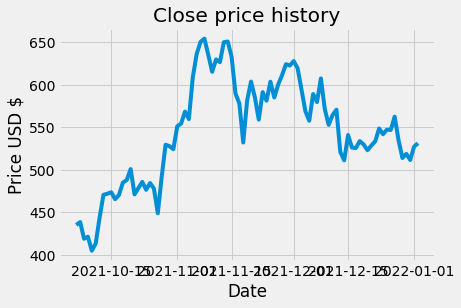

In [15]:
#plt.figure(figsize(12.2,4.5))
plt.plot(df['Close'], label=['Close'])
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD $')
plt.show()

In [17]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

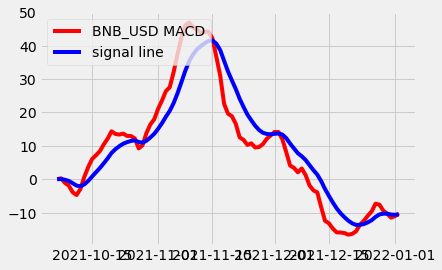

In [22]:
plt.plot(df.index, MACD, label='BNB_USD MACD', color='red')
plt.plot(df.index, signal, label='signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [23]:
df['MACD'] = MACD
df['Signal line'] = signal

In [32]:
def buy_sell(signal):
  buy = []
  sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Close'][i])
        flag = 1
      else:
        buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]:
      buy.append(np.nan)
      if flag != 0:
        sell.append(signal['Close'][i])
        flag = 0
      else:
        sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy, sell)

In [33]:
a = buy_sell(df)
df['Buy signal price'] = a[0]
df['Sell signal price'] = a[1]

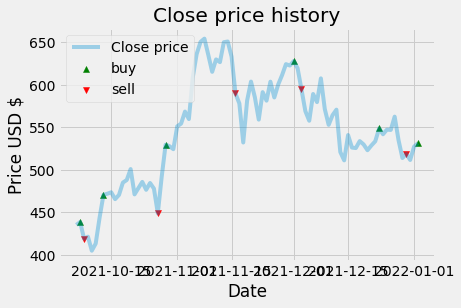

In [36]:
plt.scatter(df.index, df['Buy signal price'], color='green', label='buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell signal price'], color='red', label='sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close price', alpha=0.35)
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD $')
plt.legend(loc='upper left')
plt.show()